In [11]:
import networkx as nx
import numpy as np
import torch
import torchmetrics
import matplotlib.pyplot as plt
import os 

### Question 2

In [2]:
caltech = nx.read_gml("fb100/data/Caltech36.gml")
jhopkins = nx.read_gml("fb100/data/Johns_Hopkins55.gml")
mit = nx.read_gml("fb100/data/MIT8.gml")

A

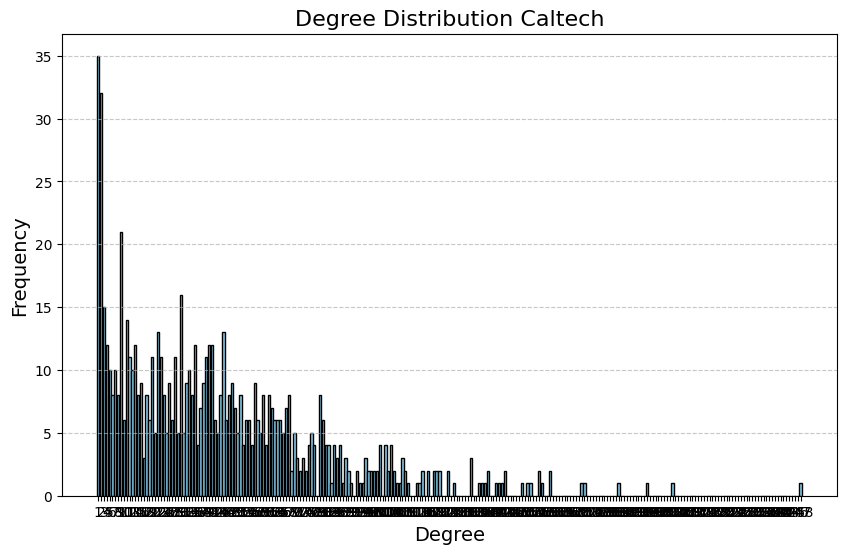

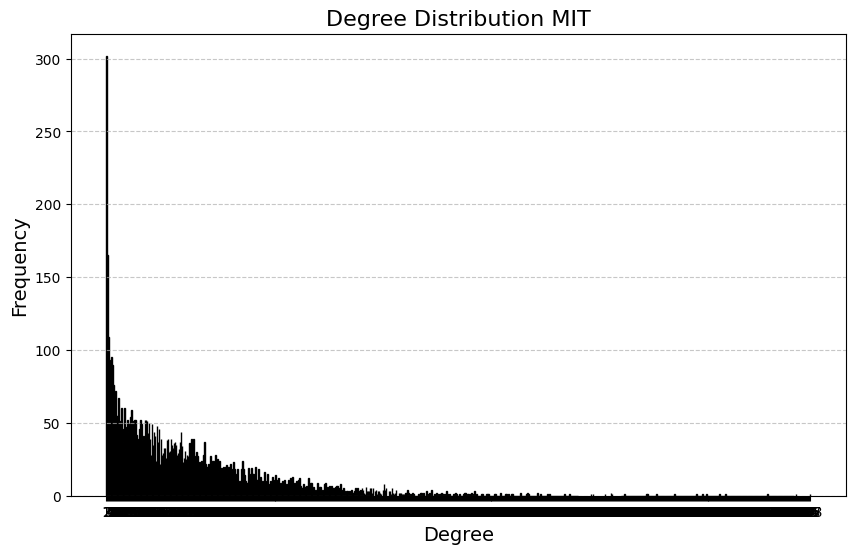

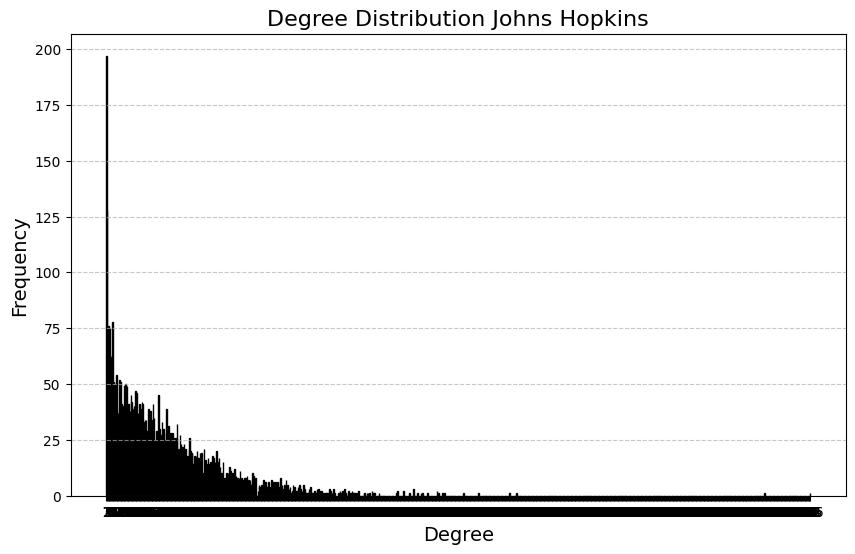

In [4]:
degrees = [degree for _, degree in caltech.degree()]
plt.figure(figsize=(10, 6))
plt.hist(degrees, bins=range(min(degrees), max(degrees) + 2), align='left', rwidth=0.8, color='skyblue', edgecolor='black')
plt.title("Degree Distribution Caltech", fontsize=16)
plt.xlabel("Degree", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(range(min(degrees), max(degrees) + 1))
plt.show()

degrees = [degree for _, degree in mit.degree()]
plt.figure(figsize=(10, 6))
plt.hist(degrees, bins=range(min(degrees), max(degrees) + 2), align='left', rwidth=0.8, color='skyblue', edgecolor='black')
plt.title("Degree Distribution MIT", fontsize=16)
plt.xlabel("Degree", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(range(min(degrees), max(degrees) + 1))
plt.show()

degrees = [degree for _, degree in jhopkins.degree()]
plt.figure(figsize=(10, 6))
plt.hist(degrees, bins=range(min(degrees), max(degrees) + 2), align='left', rwidth=0.8, color='skyblue', edgecolor='black')
plt.title("Degree Distribution Johns Hopkins", fontsize=16)
plt.xlabel("Degree", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(range(min(degrees), max(degrees) + 1))
plt.show()

B

In [7]:
global_clustering_c = nx.transitivity(caltech)
mean_local_clustering_c = nx.average_clustering(caltech)
edge_density_c = nx.density(caltech)
print(f"Caltech :\n")
print(f"Global Clustering Coefficient: {global_clustering_c:.4f}\n")
print(f"Mean Local Clustering Coefficient: {mean_local_clustering_c:.4f}\n")
print(f"Edge Density: {edge_density_c:.4f}\n")
print(f"---------------------------------------------------------------\n")

global_clustering_m = nx.transitivity(mit)
mean_local_clustering_m = nx.average_clustering(mit)
edge_density_m = nx.density(mit)
print(f"MIT :\n")
print(f"Global Clustering Coefficient: {global_clustering_m:.4f}\n")
print(f"Mean Local Clustering Coefficient: {mean_local_clustering_m:.4f}\n")
print(f"Edge Density: {edge_density_m:.4f}\n")
print(f"---------------------------------------------------------------\n")

global_clustering_j = nx.transitivity(jhopkins)
mean_local_clustering_j = nx.average_clustering(jhopkins)
edge_density_j = nx.density(jhopkins)
print(f"Johns Hopkins :\n")
print(f"Global Clustering Coefficient: {global_clustering_j:.4f}\n")
print(f"Mean Local Clustering Coefficient: {mean_local_clustering_j:.4f}\n")
print(f"Edge Density: {edge_density_j:.4f}\n")
print(f"---------------------------------------------------------------\n")

Caltech :

Global Clustering Coefficient: 0.2913

Mean Local Clustering Coefficient: 0.4093

Edge Density: 0.0564

---------------------------------------------------------------

MIT :

Global Clustering Coefficient: 0.1803

Mean Local Clustering Coefficient: 0.2712

Edge Density: 0.0121

---------------------------------------------------------------

Johns Hopkins :

Global Clustering Coefficient: 0.1932

Mean Local Clustering Coefficient: 0.2684

Edge Density: 0.0139

---------------------------------------------------------------



C

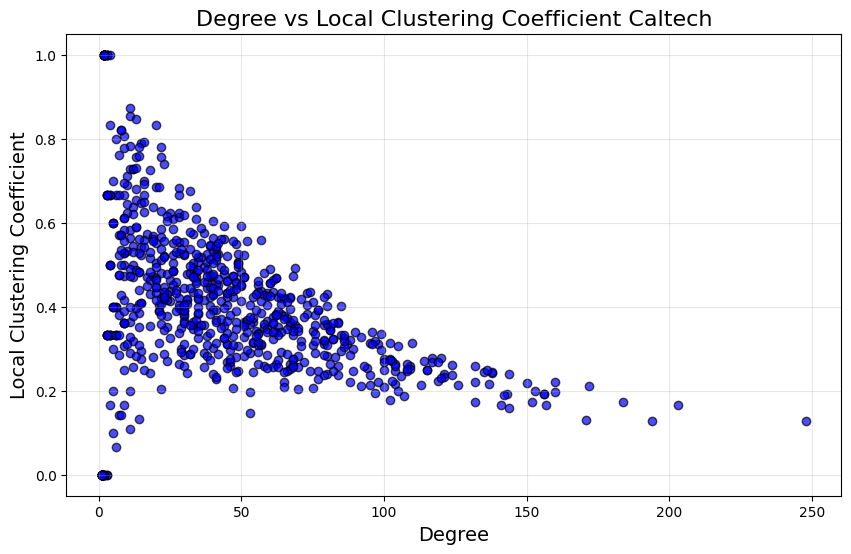

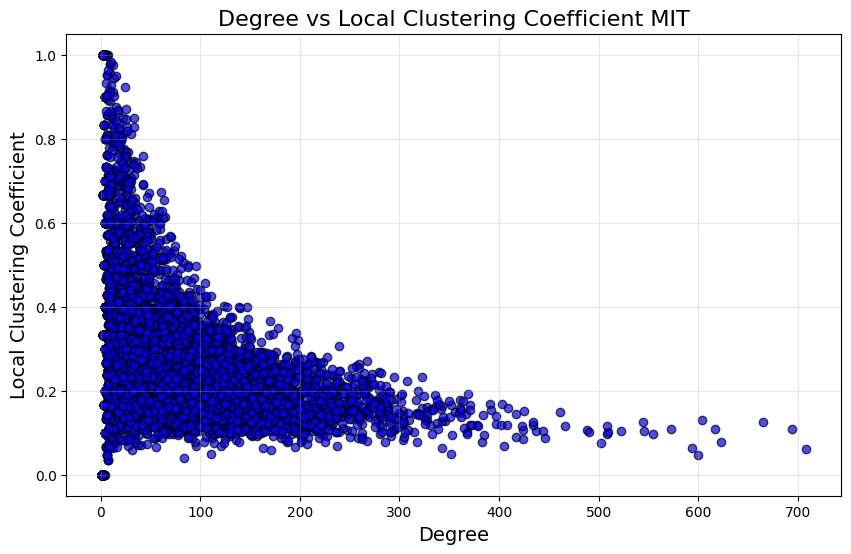

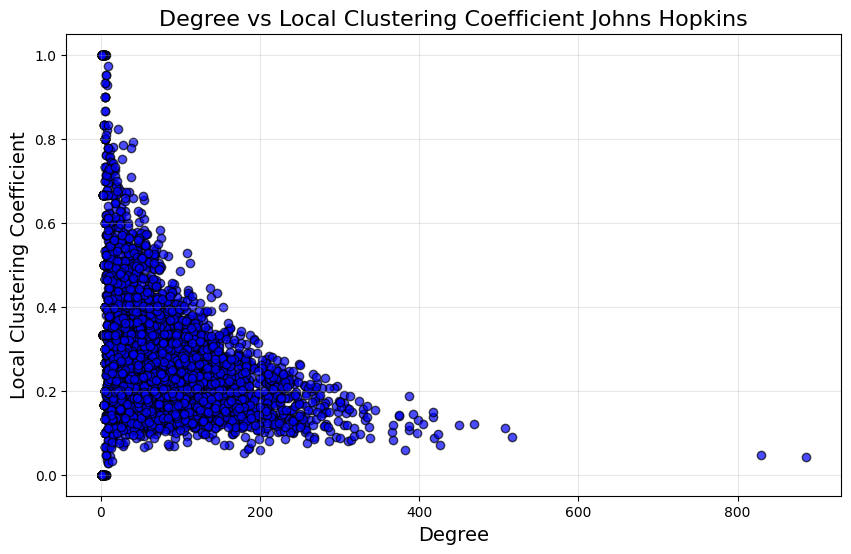

In [10]:
degrees = dict(caltech.degree())  
local_clustering = nx.clustering(caltech)  
x = list(degrees.values())  
y = list(local_clustering.values()) 
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.7, color='blue', edgecolor='black')
plt.title("Degree vs Local Clustering Coefficient Caltech", fontsize=16)
plt.xlabel("Degree", fontsize=14)
plt.ylabel("Local Clustering Coefficient", fontsize=14)
plt.grid(alpha=0.3)
plt.show()

degrees = dict(mit.degree())  
local_clustering = nx.clustering(mit)  
x = list(degrees.values())  
y = list(local_clustering.values()) 
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.7, color='blue', edgecolor='black')
plt.title("Degree vs Local Clustering Coefficient MIT", fontsize=16)
plt.xlabel("Degree", fontsize=14)
plt.ylabel("Local Clustering Coefficient", fontsize=14)
plt.grid(alpha=0.3)
plt.show()

degrees = dict(jhopkins.degree())  
local_clustering = nx.clustering(jhopkins)  
x = list(degrees.values())  
y = list(local_clustering.values()) 
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.7, color='blue', edgecolor='black')
plt.title("Degree vs Local Clustering Coefficient Johns Hopkins", fontsize=16)
plt.xlabel("Degree", fontsize=14)
plt.ylabel("Local Clustering Coefficient", fontsize=14)
plt.grid(alpha=0.3)
plt.show()

### Question 3

A

In [ ]:
data = "fb100/data"
attributes = ["student_faculty", "major", "dorm", "gender"]
results = {attr: {"sizes": [], "assortativity": []} for attr in attributes}
results["degree"] = {"sizes": [], "assortativity": []}
files = [f for f in os.listdir(data) if f.endswith(".gml")]
files = files[:50]
for gml_file in files:
    graph_path = os.path.join(data, gml_file)
    graph = nx.read_gml(graph_path)
    n = len(graph)
    for attr in attributes:
        if attr in nx.get_node_attributes(graph, attr):
            assortativity = nx.attribute_assortativity_coefficient(graph, attr)
            results[attr]["sizes"].append(n)
            results[attr]["assortativity"].append(assortativity)
    degree_assortativity = nx.degree_assortativity_coefficient(graph)
    results["degree"]["sizes"].append(n)
    results["degree"]["assortativity"].append(degree_assortativity)

In [ ]:
def plot_scatter_and_distribution(results, attr):
    sizes = results[attr]["sizes"]
    assortativity = results[attr]["assortativity"]
    plt.figure(figsize=(10, 6))
    plt.scatter(sizes, assortativity, alpha=0.7, color="blue", edgecolor="black")
    plt.xscale("log")
    plt.axhline(0, color="red", linestyle="--", linewidth=1, label="No Assortativity")
    plt.title(f"Assortativity vs Network Size ({attr.capitalize()})", fontsize=16)
    plt.xlabel("Network Size (n)", fontsize=14)
    plt.ylabel("Assortativity", fontsize=14)
    plt.grid(alpha=0.3)
    plt.legend()
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.hist(assortativity, bins=20, color="blue", edgecolor="black", alpha=0.7)
    plt.axvline(0, color="red", linestyle="--", linewidth=1, label="No Assortativity")
    plt.title(f"Distribution of Assortativity ({attr.capitalize()})", fontsize=16)
    plt.xlabel("Assortativity", fontsize=14)
    plt.ylabel("Frequency", fontsize=14)
    plt.grid(alpha=0.3)
    plt.legend()
    plt.show()